In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hmmlearn.hmm import GaussianHMM

In [5]:
df = pd.read_csv('Original_Dataset.csv')

In [6]:
df.head()

,LC_X_1,LC_X_2,LC_X_3,LC_X_4,LC_X_5,LC_X_6,LC_X_7,LC_X_8,LC_X_9,LC_X_10,...,RD_22,RD_23,RD_24,RD_25,RD_26,RD_27,RD_28,RD_29,RD_30,Gesture
0,307,389,259,259,259,259,259,258,258,259,...,1001,1001,1004,1007,1013,1013,1016,1016,1019,ZoomIn
1,340,340,340,340,339,339,340,339,338,338,...,1007,1007,1007,1010,1010,1010,1010,1013,1010,ZoomIn
2,260,263,266,266,270,271,271,271,271,271,...,962,959,0,957,957,959,959,962,962,ZoomIn
3,338,339,338,337,337,337,337,337,336,335,...,1013,1010,1010,1010,1013,1010,1010,1013,1010,ZoomIn
4,319,240,240,318,241,318,318,318,318,318,...,1016,1016,1022,1022,1013,1016,1016,1019,1019,ZoomIn


In [7]:
df.shape

(350, 781)

In [8]:
df['Gestures'] = df['Gesture'].map({'ZoomIn':0,'ZoomOut':1, 'MoveLeft':2,'MoveRight': 3, 'MoveDown': 4, 'MoveUp': 5,'Press': 6 })
     

In [9]:
df.loc[:,"Gestures"]

0      0
1      0
2      0
3      0
4      0
      ..
345    6
346    6
347    6
348    6
349    6
Name: Gestures, Length: 350, dtype: int64

In [10]:
#left-hand centroid data
lc = df.iloc[:,:60].to_numpy()
all_lc_data = lc.reshape(350,30,2)


#right-hand centroid data
rc =df.iloc[:,390:450].to_numpy()
all_rc_data = rc.reshape(350,30,2)

all_data = np.concatenate((all_lc_data,all_lc_data), axis =2)

all_data.shape


(350, 30, 4)

Normalization

In [11]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [12]:
get_data = NormalizeData(all_data)
print(get_data.shape)
print("Data after Normalization", get_data)

(350, 30, 4)
Data after Normalization [[[0.64631579 0.81894737 0.64631579 0.81894737]
  [0.54526316 0.54526316 0.54526316 0.54526316]
  [0.54526316 0.54526316 0.54526316 0.54526316]
  ...
  [0.39157895 0.38947368 0.39157895 0.38947368]
  [0.38947368 0.38526316 0.38947368 0.38526316]
  [0.38526316 0.38526316 0.38526316 0.38526316]]

 [[0.71578947 0.71578947 0.71578947 0.71578947]
  [0.71578947 0.71578947 0.71578947 0.71578947]
  [0.71368421 0.71368421 0.71368421 0.71368421]
  ...
  [0.37473684 0.37263158 0.37473684 0.37263158]
  [0.37263158 0.37263158 0.37263158 0.37263158]
  [0.37263158 0.37052632 0.37263158 0.37052632]]

 [[0.54736842 0.55368421 0.54736842 0.55368421]
  [0.56       0.56       0.56       0.56      ]
  [0.56842105 0.57052632 0.56842105 0.57052632]
  ...
  [0.37894737 0.37894737 0.37894737 0.37894737]
  [0.38315789 0.38105263 0.38315789 0.38105263]
  [0.38105263 0.38105263 0.38105263 0.38105263]]

 ...

 [[0.62736842 0.62105263 0.62736842 0.62105263]
  [0.61894737 0.6147

Split the data into training and testing

In [13]:
Model1_train_data, Model1_test_data = train_test_split( get_data[:50], test_size=0.10,random_state=42)
Model2_train_data, Model2_test_data = train_test_split( get_data[50:100], test_size=0.10, random_state=42)
Model3_train_data, Model3_test_data = train_test_split( get_data[100:150], test_size=0.10, random_state=42)
Model4_train_data, Model4_test_data = train_test_split( get_data[150:200], test_size=0.10, random_state=42)
Model5_train_data, Model5_test_data = train_test_split( get_data[200:250], test_size=0.10, random_state=42)
Model6_train_data, Model6_test_data = train_test_split( get_data[250:300], test_size=0.10, random_state=42)
Model7_train_data, Model7_test_data = train_test_split( get_data[300:350], test_size=0.10, random_state=42)
Model1_train_data.shape, Model1_test_data.shape

((45, 30, 4), (5, 30, 4))

Build the model

In [14]:
model1 = GaussianHMM()
model1.fit(Model1_train_data.reshape(-1,4))

model2 = GaussianHMM()
model2.fit(Model2_train_data.reshape(-1,4))

model3 = GaussianHMM()
model3.fit(Model3_train_data.reshape(-1,4))

model4 = GaussianHMM()
model4.fit(Model4_train_data.reshape(-1,4))

model5 = GaussianHMM()
model5.fit(Model5_train_data.reshape(-1,4))

model6 = GaussianHMM()
model6.fit(Model6_train_data.reshape(-1,4))

model7 = GaussianHMM()
model7.fit(Model7_train_data.reshape(-1,4))



GaussianHMM()

In [15]:
#models dictionary for looping
all_model = {'Model 1':model1,'Model 2':model2, 'Model 3':model3, 'Model 4':model4, 'Model 5':model5, 'Model 6':model6, 'Model 7':model7 }

In [16]:
#concatenate Test Data
TestData = np.concatenate((Model1_test_data, Model2_test_data, Model3_test_data, Model4_test_data, Model5_test_data, Model6_test_data, Model7_test_data))
print("Shape of Test Data: ", TestData.shape)

test_data_0 = list(df['Gestures'][:50][:5])
test_data_1 = list(df['Gestures'][50:100][:5])
test_data_2 = list(df['Gestures'][100:150][:5])
test_data_3 = list(df['Gestures'][150:200][:5])
test_data_4 = list(df['Gestures'][200:250][:5])
test_data_5 = list(df['Gestures'][250:300][:5])
test_data_6 = list(df['Gestures'][300:350][:5])

Test_data_pred = test_data_0 + test_data_1 + test_data_2 + test_data_3 + test_data_4 + test_data_5 + test_data_6
print(Test_data_pred)




Shape of Test Data:  (35, 30, 4)
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6]


Evalution of Test Data: 

In [17]:
def test(data, models):
    scores = [None] * len(models.values())
    mod ={}
    mod_num=1
    
    for i, m in enumerate(models.values()):
        scores[i] = m.score(data)
        mod[mod_num] = m
        mod_num+=1
        
    scores = [round(num, 4) for num in scores]
    return scores, mod


count=1
pred_Models=[]
for i in range(TestData.shape[0]):
    print('Input No of Test Data:',count)
    
    sc,mod = test(TestData[i], all_model)
    max=np.argmax(sc)
    pred_Models.append(max)
    
    count+=1
    print('Scores: ',sc)
    print('Index of Highest likelihood:',max)
    print('-----------------------------------------------------------------')
    print() 
print("Indexs of models for each test data input",pred_Models)






Input No of Test Data: 1
Scores:  [60.2007, -131.3746, 45.4115, 66.1354, 70.4735, 70.0948, 62.3962]
Index of Highest likelihood: 4
-----------------------------------------------------------------

Input No of Test Data: 2
Scores:  [103.5316, -5.2209, 46.6119, 101.4113, 84.7387, 84.9092, 66.4618]
Index of Highest likelihood: 0
-----------------------------------------------------------------

Input No of Test Data: 3
Scores:  [64.2975, -173.0833, 53.5201, 65.1623, 71.6499, 95.2245, 87.1991]
Index of Highest likelihood: 5
-----------------------------------------------------------------

Input No of Test Data: 4
Scores:  [157.5684, 164.8435, 47.6072, 146.2961, 102.5206, 103.2416, 70.3865]
Index of Highest likelihood: 1
-----------------------------------------------------------------

Input No of Test Data: 5
Scores:  [158.258, 146.4038, 50.1258, 145.2359, 102.6862, 110.6397, 78.0522]
Index of Highest likelihood: 0
-----------------------------------------------------------------

Input

Finding the Best Configuration

In [18]:
#1. hyperparameter search by training the models using a different number of components for each model.

model1_com1 = GaussianHMM(n_components=2)
model1_com1.fit(Model1_train_data.reshape(-1,4))

model2_com1 = GaussianHMM(n_components=4)
model2_com1.fit(Model2_train_data.reshape(-1,4))

model3_com1 = GaussianHMM(n_components=9)
model3_com1.fit(Model3_train_data.reshape(-1,4))

model4_com1 = GaussianHMM(n_components=12)
model4_com1.fit(Model4_train_data.reshape(-1,4))

model5_com1 = GaussianHMM(n_components=11)
model5_com1.fit(Model5_train_data.reshape(-1,4))

model6_com1 = GaussianHMM(n_components=8)
model6_com1.fit(Model6_train_data.reshape(-1,4))

model7_com1 = GaussianHMM(n_components=14)
model7_com1.fit(Model7_train_data.reshape(-1,4))

#2.Configuration2: hyperparameter search by training the models using a different number of components for each model.

model1_com2 = GaussianHMM(n_components=11)
model1_com2.fit(Model1_train_data.reshape(-1,4))

model2_com2 = GaussianHMM(n_components=2)
model2_com2.fit(Model2_train_data.reshape(-1,4))

model3_com2 = GaussianHMM(n_components=14)
model3_com2.fit(Model3_train_data.reshape(-1,4))

model4_com2 = GaussianHMM(n_components=1)
model4_com2.fit(Model4_train_data.reshape(-1,4))

model5_com2 = GaussianHMM(n_components=6)
model5_com2.fit(Model5_train_data.reshape(-1,4))

model6_com2 = GaussianHMM(n_components=7)
model6_com2.fit(Model6_train_data.reshape(-1,4))

model7_com2 = GaussianHMM(n_components=21)
model7_com2.fit(Model7_train_data.reshape(-1,4))

#3. Configuration 3: hyperparameter search by training the models using a different number of components for each model.

model1_com3 = GaussianHMM(n_components=1)
model1_com3.fit(Model1_train_data.reshape(-1,4))

model2_com3 = GaussianHMM(n_components=21)
model2_com3.fit(Model2_train_data.reshape(-1,4))

model3_com3 = GaussianHMM(n_components=9)
model3_com3.fit(Model3_train_data.reshape(-1,4))

model4_com3 = GaussianHMM(n_components=13)
model4_com3.fit(Model4_train_data.reshape(-1,4))

model5_com3 = GaussianHMM(n_components=22)
model5_com3.fit(Model5_train_data.reshape(-1,4))

model6_com3 = GaussianHMM(n_components=4)
model6_com3.fit(Model6_train_data.reshape(-1,4))

model7_com3 = GaussianHMM(n_components=8)
model7_com3.fit(Model7_train_data.reshape(-1,4))





GaussianHMM(n_components=8)

In [19]:
models_comp_1 = [model1_com1,model2_com1, model3_com1, model4_com1, model5_com1, model6_com1, model7_com1]
models_comp_2 = [model1_com2, model2_com2, model3_com2, model4_com3, model5_com2, model6_com2, model7_com2]
models_comp_3 = [model1_com3, model2_com3, model3_com3, model4_com3, model5_com3, model6_com3, model7_com3]



In [27]:
def test1(data, models):
    scores = [None] * len(models)
    mod ={}
    mod_num=1
    
    for i, m in enumerate(models):
        scores[i] = m.score(data)
        mod[mod_num] = m
        mod_num+=1
        
    scores = [round(num, 4) for num in scores]
    return scores, mod

In [28]:
#test accuracy
def accuracy(predicted_data):
    counter = 0
    
    for i in range(len(predicted_data)):
        if Test_data_pred[i] == predicted_data[i]:
            counter+=1
    model_accuracy = (counter / len(predicted_data) * 100)
    return model_accuracy

In [22]:

def evaluation_testData(data, model):
    count=1
    predlabels=[]
    for i in range(data.shape[0]):
        print('Input No:',count)

        sc,mod = test1(TestData[i], model)
        max=np.argmax(sc)
        predlabels.append(max)

        count+=1
        print('Scores: ',sc)
        print('Models: ',mod)
        print('Max Score:',sc[max])
        print('-------------------------------------')
        print() 
    print(predlabels)

    return predlabels
    

Configuration 1

In [29]:
# Calling function evaluation_testing_data to calculate max likelihood
pred_for_Configuration_1 = evaluation_testData(TestData, models_comp_1)

Input No: 1
Scores:  [81.1163, -120.0233, 150.5393, 30.2986, -164.7814, 58.702, 14.8582]
Models:  {1: GaussianHMM(n_components=2), 2: GaussianHMM(n_components=4), 3: GaussianHMM(n_components=9), 4: GaussianHMM(n_components=12), 5: GaussianHMM(n_components=11), 6: GaussianHMM(n_components=8), 7: GaussianHMM(n_components=14)}
Max Score: 150.5393
-------------------------------------

Input No: 2
Scores:  [120.1758, -77.7189, 207.942, 232.0521, 83.4685, 17.9501, 16.1681]
Models:  {1: GaussianHMM(n_components=2), 2: GaussianHMM(n_components=4), 3: GaussianHMM(n_components=9), 4: GaussianHMM(n_components=12), 5: GaussianHMM(n_components=11), 6: GaussianHMM(n_components=8), 7: GaussianHMM(n_components=14)}
Max Score: 232.0521
-------------------------------------

Input No: 3
Scores:  [49.6004, -135.1638, 77.8514, -44.4746, -131.2719, 102.8903, 61.3352]
Models:  {1: GaussianHMM(n_components=2), 2: GaussianHMM(n_components=4), 3: GaussianHMM(n_components=9), 4: GaussianHMM(n_components=12), 5

In [24]:
accuracy = accuracy(pred_for_Configuration_1)
print("Test Accuracy for configuration1", accuracy, "%")

Test Accuracy for configuration1 54.285714285714285 %


Configuration 2

In [25]:
pred_for_Configuration_2 = evaluation_testData(TestData, models_comp_2)

Input No: 1
Scores:  [94.3887, -59.714, 124.3994, -178.895, 152.2144, 42.9913, 67.1381]
Models:  {1: GaussianHMM(n_components=11), 2: GaussianHMM(n_components=2), 3: GaussianHMM(n_components=14), 4: GaussianHMM(n_components=13), 5: GaussianHMM(n_components=6), 6: GaussianHMM(n_components=7), 7: GaussianHMM(n_components=21)}
Max Score: 152.2144
-------------------------------------

Input No: 2
Scores:  [138.0817, -5.1421, 267.098, 280.6647, 161.7175, 15.2961, 151.0098]
Models:  {1: GaussianHMM(n_components=11), 2: GaussianHMM(n_components=2), 3: GaussianHMM(n_components=14), 4: GaussianHMM(n_components=13), 5: GaussianHMM(n_components=6), 6: GaussianHMM(n_components=7), 7: GaussianHMM(n_components=21)}
Max Score: 280.6647
-------------------------------------

Input No: 3
Scores:  [86.0463, -50.7631, 125.0681, -207.8123, 55.712, 123.4068, 164.3906]
Models:  {1: GaussianHMM(n_components=11), 2: GaussianHMM(n_components=2), 3: GaussianHMM(n_components=14), 4: GaussianHMM(n_components=13)

In [30]:
#accuracy for config2
accuracy2 = accuracy(pred_for_Configuration_2)
print("Test Accuracy for configuration2", accuracy2, "%")



Test Accuracy for configuration2 42.857142857142854 %


Configuration 3 

In [ ]:
pred_for_Configuration_3 = evaluation_testData(TestData, models_comp_3)

Input No: 1
Scores:  [60.2007, -71.2885, 94.6229, -184.8702, -439.176, -44.4948, 76.8627]
Models:  {1: GaussianHMM(), 2: GaussianHMM(n_components=21), 3: GaussianHMM(n_components=9), 4: GaussianHMM(n_components=13), 5: GaussianHMM(n_components=22), 6: GaussianHMM(n_components=4), 7: GaussianHMM(n_components=8)}
Max Index: 2
-------------------------------------

Input No: 2
Scores:  [103.5316, 111.2699, 190.927, 280.6866, 120.1138, 121.2304, 25.4602]
Models:  {1: GaussianHMM(), 2: GaussianHMM(n_components=21), 3: GaussianHMM(n_components=9), 4: GaussianHMM(n_components=13), 5: GaussianHMM(n_components=22), 6: GaussianHMM(n_components=4), 7: GaussianHMM(n_components=8)}
Max Index: 3
-------------------------------------

Input No: 3
Scores:  [64.2975, -81.6218, 122.2065, -212.2445, -377.0565, -3.2651, 149.9601]
Models:  {1: GaussianHMM(), 2: GaussianHMM(n_components=21), 3: GaussianHMM(n_components=9), 4: GaussianHMM(n_components=13), 5: GaussianHMM(n_components=22), 6: GaussianHMM(n_co

In [ ]:
#accuracy for config3
accuracy3 = accuracy(pred_for_Configuration_3)
print("Test Accuracy for configuration3", accuracy3,"%")

Test Accuracy for configuration3 51.42857142857142 %


Sampling from the HMM

In [ ]:
def plotSample(X,y,title):
    fig, axes = plt.subplots(figsize=(8,10))
    axes.plot(X,y, ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)
    axes.legend(loc='upper left',fontsize=12,labelcolor='green',labelspacing=1)
    axes.set_title(label=title,size=12,pad=12)
    fig.show()


Model 1: 4 samples generated

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


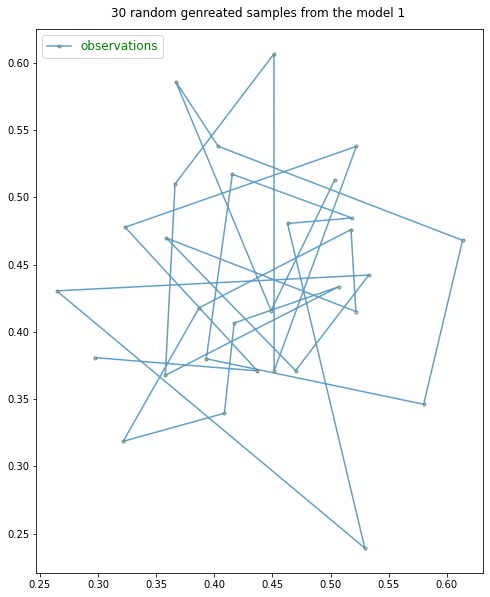

In [ ]:
X, y = model1.sample(30)
plotSample(X[:, 0], X[:, 1], title='30 random genreated samples from the model 1 ')


C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


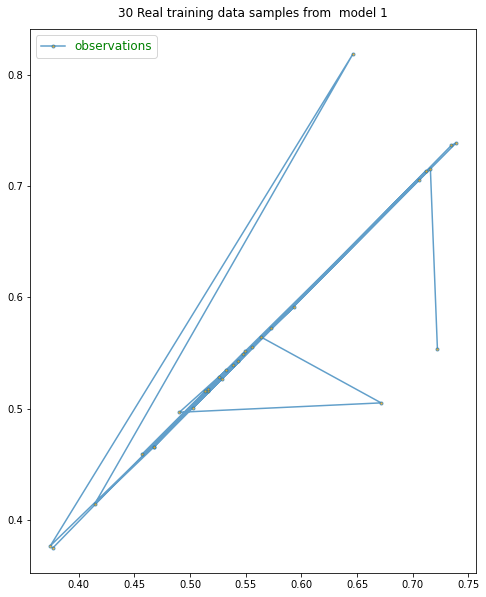

In [ ]:
# plot actual train data
plotSample(Model1_train_data[:, 0][:30,:1], Model1_train_data[:, 0][:30,1:2], title='30 Real training data samples from  model 1')

Model 2: 4 samples Generated

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


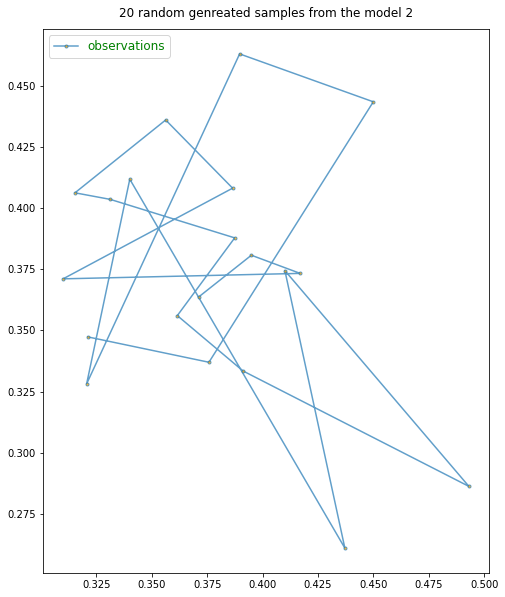

In [ ]:
X, y = model2.sample(20)
plotSample(X[:, 0], X[:, 1], title='20 random genreated samples from the model 2')

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


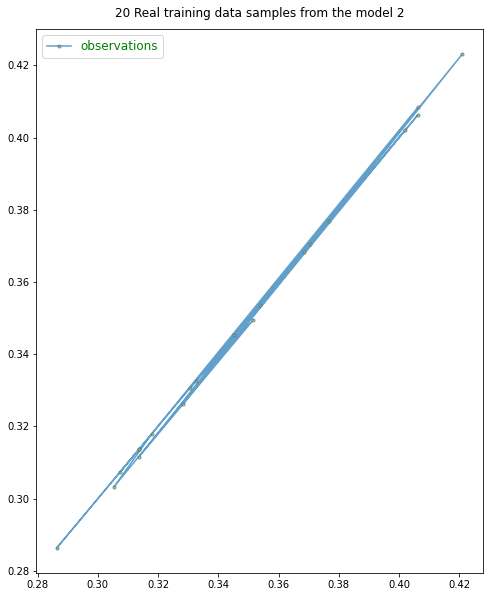

In [ ]:
# plot actual train data
plotSample(Model2_train_data[:, 0][:20,:1], Model2_train_data[:, 0][:20,1:2], title='20 Real training data samples from the model 2')

Model 3: 4 samples

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


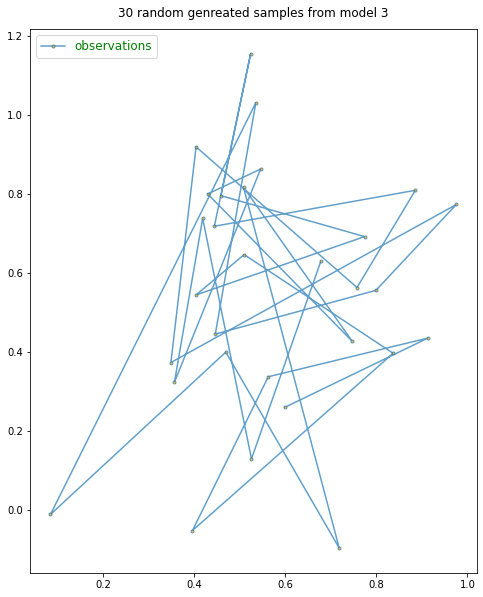

In [ ]:
X, y = model3.sample(30)
plotSample(X[:, 0], X[:, 1], title='30 random genreated samples from model 3')

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


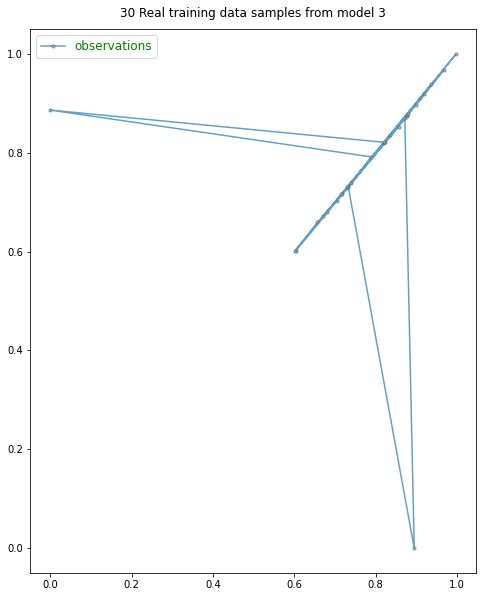

In [ ]:
# plot actual train data
plotSample(Model3_train_data[:, 0][:30,:1], Model3_train_data[:, 0][:30,1:2], title='30 Real training data samples from model 3')

Model 4

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


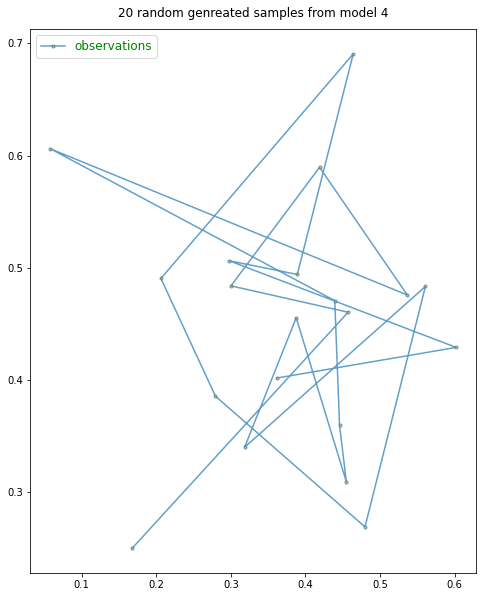

In [ ]:
X, y = model4.sample(20)
plotSample(X[:, 0], X[:, 1], title='20 random genreated samples from model 4')

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


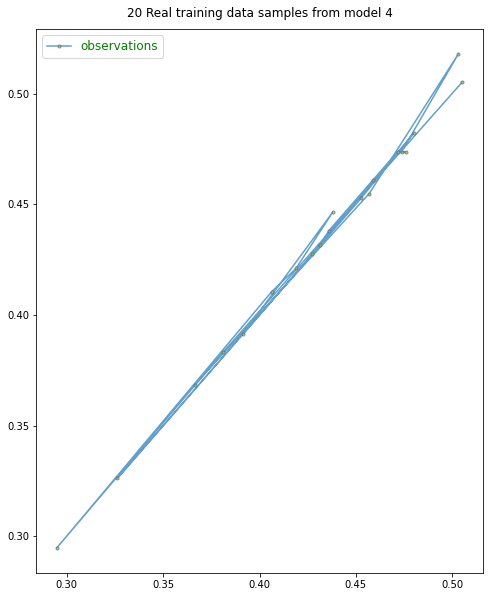

In [ ]:
# plot actual train data
plotSample(Model4_train_data[:, 0][:20,:1], Model4_train_data[:, 0][:20,1:2], title='20 Real training data samples from model 4')

Model 5

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


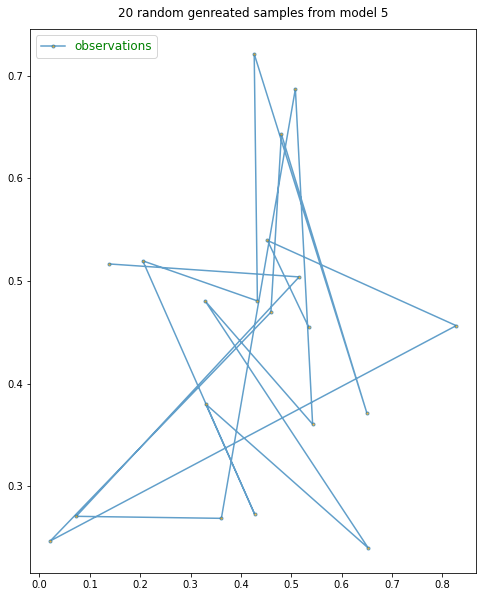

In [ ]:
X, y = model5.sample(20)
plotSample(X[:, 0], X[:, 1], title='20 random genreated samples from model 5')

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


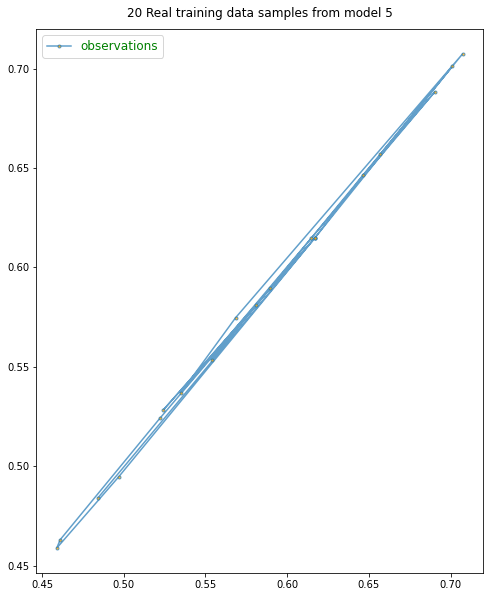

In [ ]:
# plot actual train data
plotSample(Model5_train_data[:, 0][:20,:1], Model5_train_data[:, 0][:20,1:2], title='20 Real training data samples from model 5')

Model 6

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


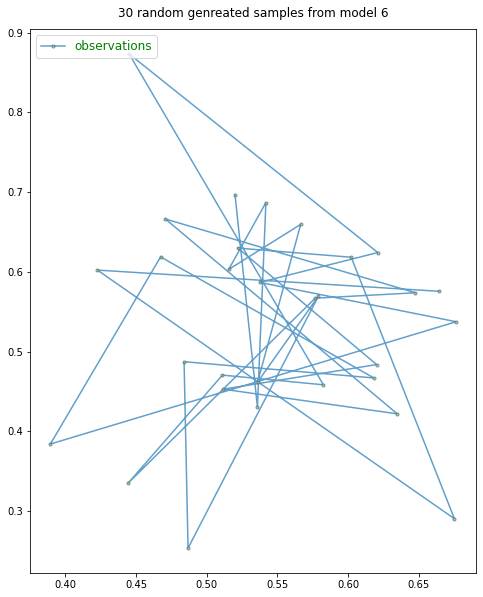

In [ ]:
X, y = model6.sample(30)
plotSample(X[:, 0], X[:, 1], title='30 random genreated samples from model 6')

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


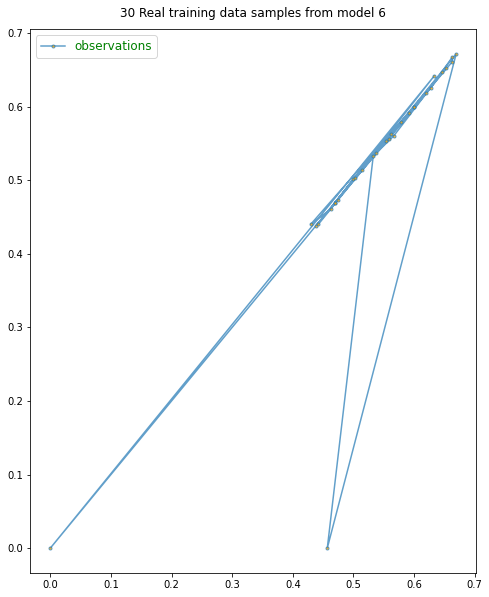

In [ ]:
# plot actual train data
plotSample(Model6_train_data[:, 0][:30,:1], Model6_train_data[:, 0][:30,1:2], title='30 Real training data samples from model 6')

Model 7

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


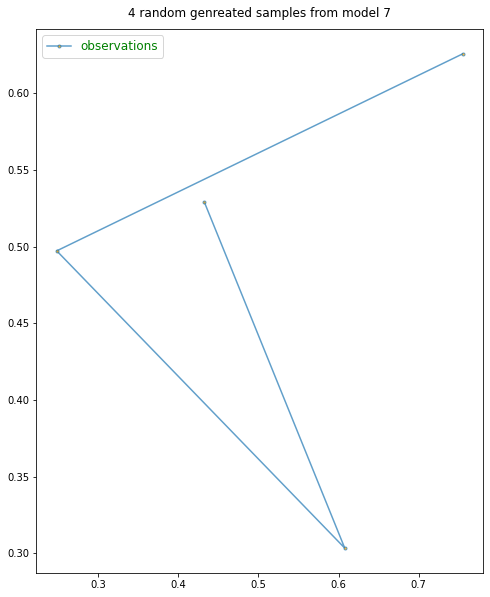

In [ ]:
X, y = model7.sample(4)
plotSample(X[:, 0], X[:, 1], title='4 random genreated samples from model 7')

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_25480\1941596033.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


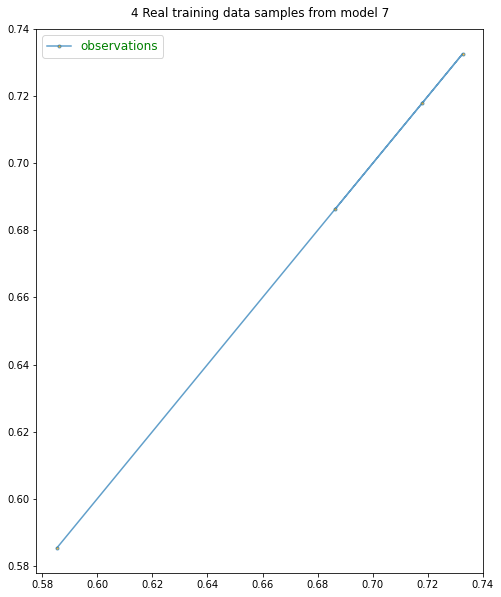

In [ ]:
# plot actual train data
plotSample(Model7_train_data[:, 0][:4,:1], Model7_train_data[:, 0][:4,1:2], title='4 Real training data samples from model 7')

Forward Algorithm

In [31]:
def forwards(o, A_, B_, pi_):
    n_states_ = A_.shape[0]
    seq_length = o.shape[0]
    forward = np.zeros((n_states_, seq_length))
    
    #initializtion step
    for s in range(n_states_):
        forward[s, 0] = pi_[s]*B_[s,o[0]]

    #recursive step
    for t in range(1,seq_length):
        for s in range(n_states_):
            for sp in range(n_states_):
                forward[s,t] += forward[sp, t-1]* A_[sp,s]*B_[s,o[t]]

        #termination step
    forward_prob =np.sum(forward[:, -1])

    print(forward)

    return forward_prob